In [24]:
import matplotlib.pyplot as plt 
from misc import *
import tensorflow as tf
from tqdm import tqdm
import os 
from RNN_models import *


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from misc import load_data, get_def_path

periods = 5
ppp=1000
defpath = get_def_path()
path = defpath+"{}periods/{}ppp/".format(periods,ppp)


In [26]:
means, covs, signals, coeffs = load_data(path)
tfsignals = tf.convert_to_tensor(signals)[tf.newaxis]
A,dt,C,D = coeffs

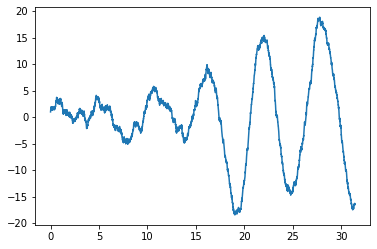

In [27]:
times = np.linspace(0,periods*2*np.pi, periods*ppp+1)
total_time = times[-1]
plt.plot(times, means[:,0])

In [28]:
rmodel = GRNNmodel([C,D,dt, total_time], cov_in=tf.convert_to_tensor(covs[0].astype(np.float32)), stateful=False)
rmodel.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01))
rmodel.recurrent_layer(tfsignals[:,:10,:], initial_state=rmodel.initial_state)
#rmodel.trainable_variables[0].assign(tf.convert_to_tensor(A.astype(np.float32)))



<tf.Tensor: shape=(1, 10, 2), dtype=float32, numpy=
array([[[ 0.01256637,  0.        ],
        [ 0.01382301, -0.00114198],
        [ 0.0128796 , -0.00239861],
        [ 0.01413624, -0.00365525],
        [ 0.01539287, -0.00491189],
        [ 0.01607983, -0.00548227],
        [ 0.01733647, -0.00673891],
        [ 0.01685808, -0.00762582],
        [ 0.01811472, -0.00888246],
        [ 0.01792888, -0.01013909]]], dtype=float32)>

In [29]:

history = rmodel.fit(x=tfsignals, y=tfsignals, 
                     epochs = 10**3, callbacks = [tf.keras.callbacks.EarlyStopping(monitor='total_loss', 
                                                                                   min_delta=0, patience=500,
                                                                                   verbose=0,
                                                                                   mode='min')])



Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 2.9310e-04 - Coeffs_A: -6.3296e-04 - grads: 9.0046e-06
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 2.9234e-04 - Coeffs_A: -0.0051 - grads: 8.9418e-06
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 2.9156e-04 - Coeffs_A: -0.0096 - grads: 8.8568e-06
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 2.9075e-04 - Coeffs_A: -0.0142 - grads: 8.7957e-06
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 2.8995e-04 - Coeffs_A: -0.0189 - grads: 8.7332e-06
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 2.8914e-04 - Coeffs_A: -0.0235 - grads: 8.7315e-06
Epoch 7/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 2.8833e-04 - Coeffs_A: -0.0282 - grads: 8.6897e-06
Epoch 8/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 2.8751e-04 - Co

1/1 [==============================] - 0s 1ms/step - total_loss: 2.4933e-04 - Coeffs_A: -0.2672 - grads: 2.8239e-06
Epoch 65/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 2.4884e-04 - Coeffs_A: -0.2702 - grads: 2.6878e-06
Epoch 66/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 2.4836e-04 - Coeffs_A: -0.2731 - grads: 2.5831e-06
Epoch 67/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 2.4788e-04 - Coeffs_A: -0.2760 - grads: 2.4835e-06
Epoch 68/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 2.4742e-04 - Coeffs_A: -0.2788 - grads: 2.3701e-06
Epoch 69/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 2.4695e-04 - Coeffs_A: -0.2815 - grads: 2.2852e-06
Epoch 70/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 2.4650e-04 - Coeffs_A: -0.2842 - grads: 2.1830e-06
Epoch 71/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 2.4605e-04 - Coeffs_A: -0

KeyboardInterrupt: 

In [30]:
rmodel.trainable_variables

[<tf.Variable 'rnn/stacked_rnn_cells/rcell/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-0.6771794 ,  0.917597  ],
        [-0.9310472 , -0.63289887]], dtype=float32)>]

In [31]:
histories = rmodel.history.history
#keys_histories = list(histories.keys())
#for k,v, in histories.items():
 #   np.save(train_path+"{}".format(k), v, allow_pickle=True)


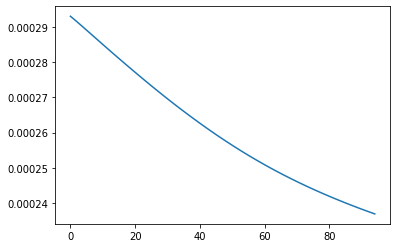

In [34]:
plt.plot(histories["total_loss"])